## DOWN JONES MACD CROSSOVER

MACD is Moving average Convergence/Divergence method that will be applyed to
the Down Jones Index DataSet in order to determine when to buy or sell stocks

MACD is a analysis indicator used in finacial market based on Moving Averages that shows up and down trends. This Indicator represents the differentiation between short term Exp. Moving Averages.

In the MACD Histogram, this index has:
1 - Positive Values if the long term MA is lower than the Short-term MA (High Trend)
2- Negative Values of Trend, Not the best time to make a purchase (Low Trend)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
%config Completer.use_jedi = False
plt.style.use('fivethirtyeight')

In [2]:
dji_df = pd.read_csv('DJI.csv')
dji_df = dji_df.set_index(pd.DatetimeIndex(dji_df['Date']))
dji_df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2020-01-21,2020-01-21,29269.050781,29341.210938,29146.470703,29196.039063,29196.039063,320640000
2020-01-22,2020-01-22,29263.630859,29320.199219,29172.259766,29186.269531,29186.269531,283440000
2020-01-23,2020-01-23,29111.019531,29190.470703,28966.980469,29160.089844,29160.089844,307060000
2020-01-24,2020-01-24,29230.390625,29288.789063,28843.310547,28989.730469,28989.730469,380010000
2020-01-27,2020-01-27,28542.490234,28671.789063,28440.470703,28535.800781,28535.800781,337270000
2020-01-28,2020-01-28,28594.279297,28823.230469,28575.750000,28722.849609,28722.849609,330140000
2020-01-29,2020-01-29,28820.529297,28944.240234,28728.189453,28734.449219,28734.449219,302290000
2020-01-30,2020-01-30,28640.160156,28879.710938,28489.759766,28859.439453,28859.439453,326850000
2020-01-31,2020-01-31,28813.039063,28813.039063,28169.529297,28256.029297,28256.029297,403890000


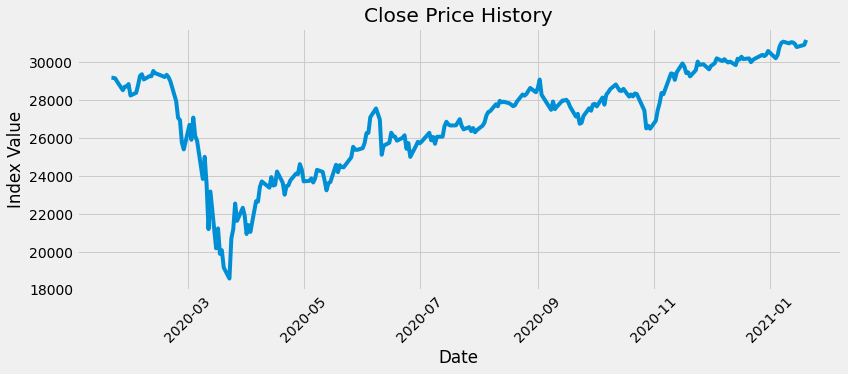

In [3]:
plt.figure(figsize=(12.2,4.5))
plt.plot(dji_df['Close'],label='Close')
plt.xticks(rotation=45)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.show()

1- Calculate the MACD and signal line Indicators
2- Calculate the short term exponential moving average (EMA)
3- Calculate Long Term EMA

In [4]:
shortEMA = dji_df.Close.ewm(span=12, adjust=False).mean()
LongEMA = dji_df.Close.ewm(span=26, adjust=False).mean()
# Calculate MACD Line 
MACD = shortEMA - LongEMA

#### Transaction Signals

Frequently, an EMA is calculated with MACD values. In this case, the MACD line is applied to generate transaction signals to demonstrate trend changes.
The Signal Line is usually obtained from a EMA with 9 periods long.

Then, in the MACD Plot:
- Transaction Signals is shown in the moment that the signal line is crossed by MACD Line
- High Signals indicate Purchase possibility, when MACD crosses Signal from bottom to top of the chart

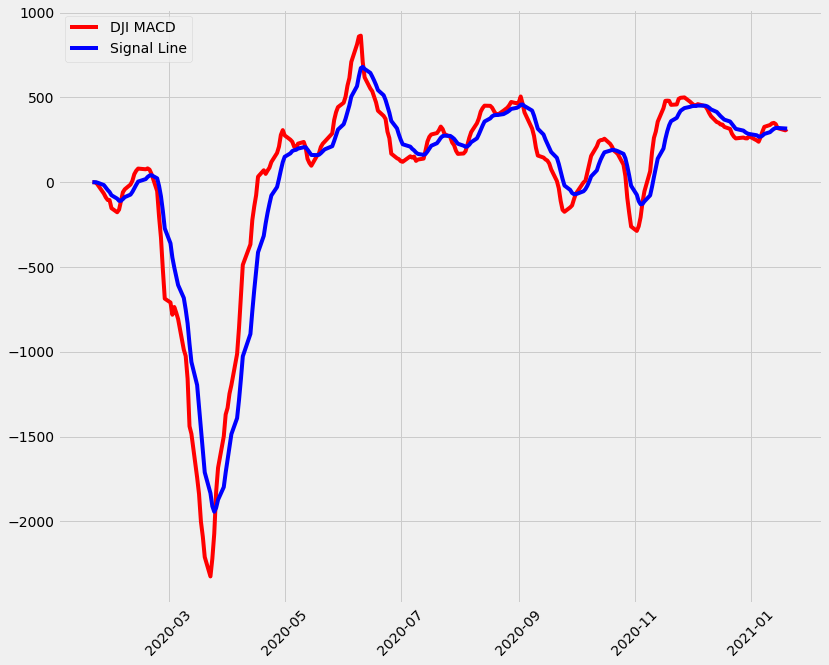

In [5]:
signal = MACD.ewm(span=9, adjust=False).mean()
#plot Chart
plt.figure(figsize=(12.2,10.2))
plt.plot(dji_df.index,MACD, label = 'DJI MACD', color='red')
plt.plot(dji_df.index,signal, label='Signal Line', color='blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

Add Chart Data to DataFrame

In [8]:
dji_df['MACD'] = MACD
dji_df['Signal Line'] = signal
dji_df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
Date,,,,,,,,,
2020-01-21,2020-01-21,29269.050781,29341.210938,29146.470703,29196.039063,29196.039063,320640000,0.000000,0.000000
2020-01-22,2020-01-22,29263.630859,29320.199219,29172.259766,29186.269531,29186.269531,283440000,-0.779336,-0.155867
2020-01-23,2020-01-23,29111.019531,29190.470703,28966.980469,29160.089844,29160.089844,307060000,-3.469453,-0.818584
2020-01-24,2020-01-24,29230.390625,29288.789063,28843.310547,28989.730469,28989.730469,380010000,-19.127479,-4.480363
2020-01-27,2020-01-27,28542.490234,28671.789063,28440.470703,28535.800781,28535.800781,337270000,-67.388101,-17.061911
...,...,...,...,...,...,...,...,...,...
2021-01-13,2021-01-13,31084.880859,31153.369141,30992.050781,31060.470703,31060.470703,413250000,349.326202,313.958877
2021-01-14,2021-01-14,31085.669922,31223.779297,30982.240234,30991.519531,30991.519531,427810000,342.102957,319.587693
2021-01-15,2021-01-15,30926.769531,30941.980469,30612.669922,30814.259766,30814.259766,433000000,318.404730,319.351101


In [11]:
def buy_signal(signal):
    buy=[]
    sell=[]
    flag = -1
    for i in range(0,len(signal)):
        if signal['MACD'][i]>signal['Signal Line'][i]:
            sell.append(np.nan)
            if flag != 1:
                buy.append(signal['Close'][i])
                flag=1
            else:
                buy.append(np.nan)
        elif signal['MACD'][i]<signal['Signal Line'][i]:
            buy.append(np.nan)
            if flag != 0:
                sell.append(signal['Close'][i])
                flag=0
            else:
                sell.append(np.nan)
        else:
            sell.append(np.nan)
            buy.append(np.nan)
    return (buy,sell)
        
        

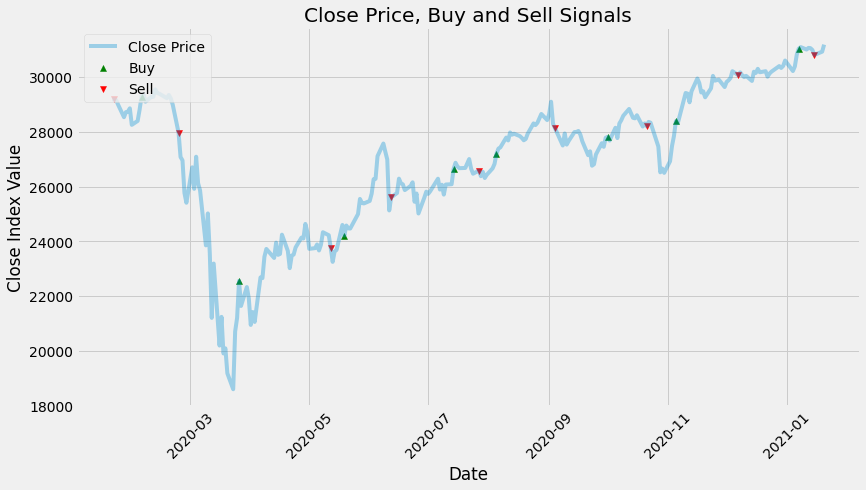

In [14]:
result = buy_signal(dji_df)
dji_df['Buy_signal'] = result[0]
dji_df['Sell_signal'] = result[1]
plt.figure(figsize=(12.5,6.5))
plt.scatter(dji_df.index,dji_df['Buy_signal'], color='green',label='Buy',marker='^',alpha=1)
plt.scatter(dji_df.index,dji_df['Sell_signal'], color='red',label='Sell',marker='v',alpha=1)
plt.plot(dji_df['Close'], label='Close Price', alpha=0.35)
plt.title('Close Price, Buy and Sell Signals')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Index Value')
plt.legend(loc="upper left")
plt.show()